# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset


In [70]:
df=pd.read_csv('/content/Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [71]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000,6324.000000
mean,16.043327,64.355629,12.013283,12.557875,18.658128,107.584915
std,8.956907,44.307088,11.363955,12.319831,10.724822,55.850784
min,1.000000,5.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,18.000000,3.000000,1.000000,10.000000,53.000000
50%,16.000000,61.000000,9.000000,10.000000,18.000000,103.000000
75%,24.000000,101.250000,19.000000,20.000000,27.000000,151.000000
max,31.000000,180.000000,70.000000,50.000000,60.000000,279.000000


Traffic Situation
normal    3858
heavy     1137
low        834
high       495
Name: count, dtype: int64


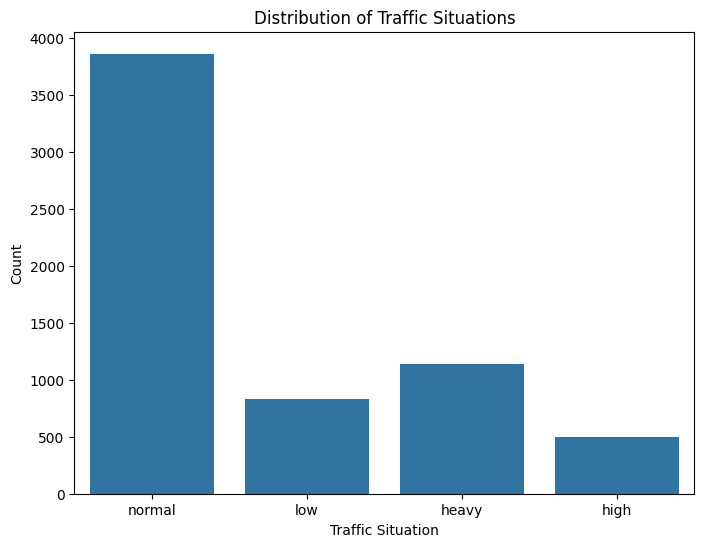

In [72]:
traffic_counts = df['Traffic Situation'].value_counts()

print(traffic_counts)

plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

In [73]:
df.dtypes

,0
Time,object
Date,int64
Day of the week,object
CarCount,int64
BikeCount,int64
BusCount,int64
TruckCount,int64
Total,int64
Traffic Situation,object


In [74]:
day_mapping = {
    'Monday': 1,
    'Tuesday': 2,
    'Wednesday': 3,
    'Thursday': 4,
    'Friday': 5,
    'Saturday': 6,
    'Sunday': 7
}

df['Day of the week'] = df['Day of the week'].map(day_mapping)


<ipython-input-75-512ccba499e3>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


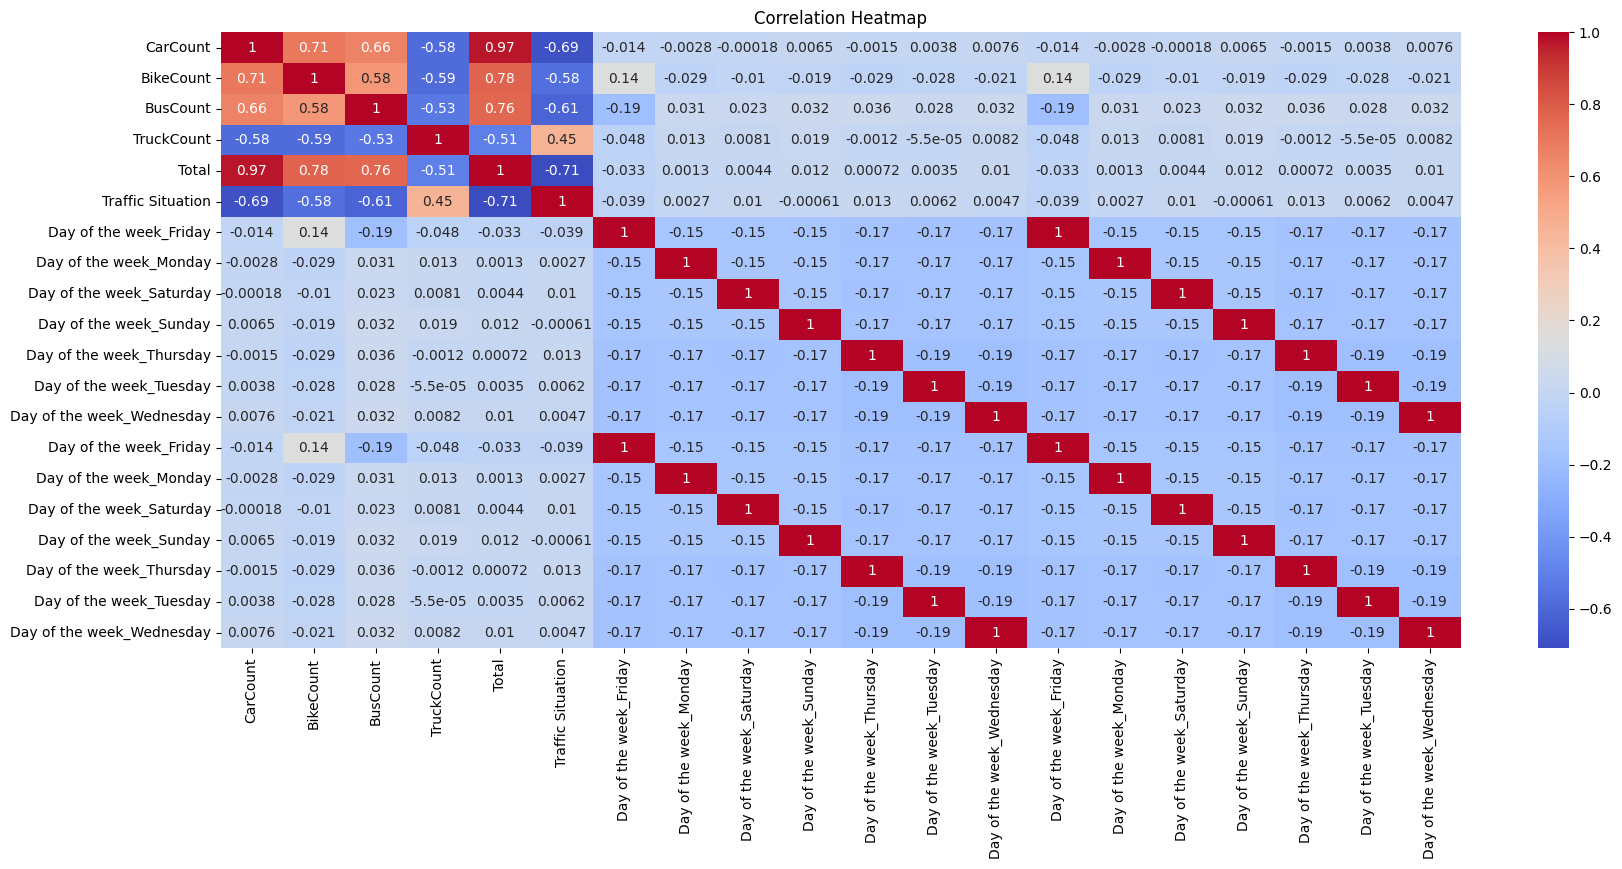

In [75]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute
df['Traffic Situation'] = df['Traffic Situation'].astype('category').cat.codes
corr = df.drop('Time', axis=1).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [76]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0
Hour,0


In [77]:
df['Day of the week'] = df['Day of the week'].fillna(df['Day of the week'].mode()[0])

In [78]:
df.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0
Hour,0


In [79]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Time               6324 non-null   datetime64[ns]
 1   Date               6324 non-null   int64         
 2   Day of the week    6324 non-null   int64         
 3   CarCount           6324 non-null   int64         
 4   BikeCount          6324 non-null   int64         
 5   BusCount           6324 non-null   int64         
 6   TruckCount         6324 non-null   int64         
 7   Total              6324 non-null   int64         
 8   Traffic Situation  6324 non-null   int8          
 9   Hour               6324 non-null   int32         
 10  Minute             6324 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(7), int8(1)
memory usage: 451.0 KB


In [80]:
!pip install scikit-learn==1.3.0
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
ohe = OneHotEncoder()
encoded_data = ohe.fit_transform(df[['Day of the week']]).toarray()
encoded_df = pd.DataFrame(encoded_data, columns=ohe.get_feature_names_out(['Day of the week']))
df = pd.concat([df, encoded_df], axis=1)
df = df.drop('Day of the week', axis=1)
le = LabelEncoder()
df['Traffic Situation'] = le.fit_transform(df['Traffic Situation'])

In [81]:
from sklearn.preprocessing import StandardScaler
features=['CarCount','BikeCount','BusCount','TruckCount','Total']
scaler=StandardScaler()
df[features]=scaler.fit_transform(df[features])

In [82]:
df=df.drop(['Time','Date'],axis=1)

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

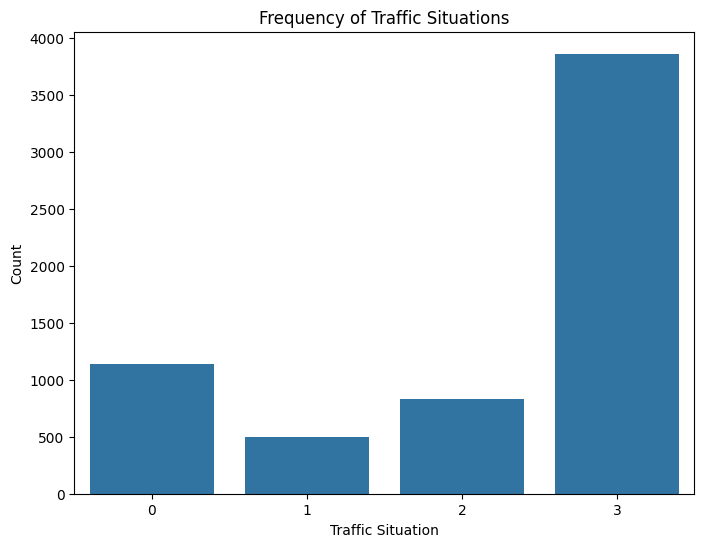

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Frequency of Traffic Situations')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()

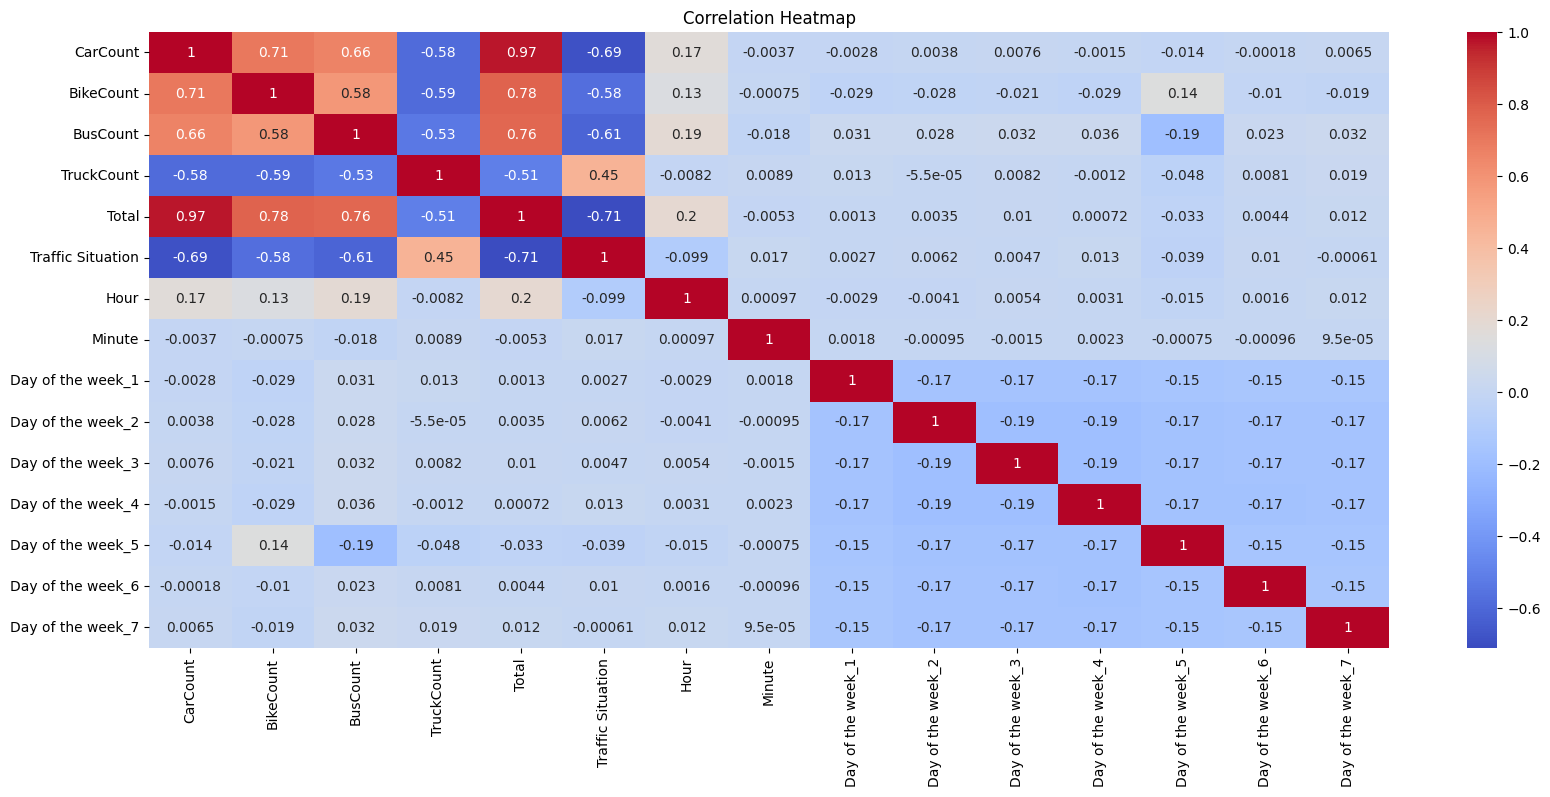

In [84]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [85]:
X = df.drop('Traffic Situation', axis=1)
y = df['Traffic Situation']

In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [87]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Evaluate the model performance

In [88]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8988142292490119
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.78      0.78      0.78       102
           2       0.69      0.80      0.74       149
           3       0.93      0.90      0.92       794

    accuracy                           0.90      1265
   macro avg       0.85      0.87      0.86      1265
weighted avg       0.90      0.90      0.90      1265

Confusion Matrix:
 [[220   0   0   0]
 [  0  80   0  22]
 [  0   0 119  30]
 [  1  22  53 718]]


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

### Evaluate the model performance

In [90]:
y_pred = gb_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9177865612648222
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.85      0.80      0.83       102
           2       0.72      0.87      0.79       149
           3       0.95      0.92      0.93       794

    accuracy                           0.92      1265
   macro avg       0.88      0.90      0.89      1265
weighted avg       0.92      0.92      0.92      1265

Confusion Matrix:
 [[220   0   0   0]
 [  0  82   0  20]
 [  0   0 130  19]
 [  0  14  51 729]]


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [91]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', rf_classifier),
    ('gb', gb_classifier)
]

stacking_classifier = StackingClassifier(estimators=estimators)
stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))])

In [92]:
y_pred = stacking_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9675889328063241
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.98      0.84      0.91       102
           2       0.92      0.93      0.92       149
           3       0.97      0.98      0.97       794

    accuracy                           0.97      1265
   macro avg       0.97      0.94      0.95      1265
weighted avg       0.97      0.97      0.97      1265

Confusion Matrix:
 [[220   0   0   0]
 [  0  86   0  16]
 [  0   0 138  11]
 [  0   2  12 780]]


### Define meta-learner (LogisticRegression)

In [93]:
from sklearn.linear_model import LogisticRegression

meta_learner = LogisticRegression()


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [94]:
from sklearn.linear_model import LogisticRegression  # Or any other classifier you want
from sklearn.ensemble import StackingClassifier

estimators = [
    ('rf', rf_classifier),
    ('gb', gb_classifier)
]

meta_learner = LogisticRegression()

stacking_classifier = StackingClassifier(
    estimators=estimators,
    final_estimator=meta_learner
)

stacking_classifier.fit(X_train, y_train)


StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression())

### Evaluate the model performance

In [95]:
y_pred = stacking_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.9675889328063241
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.98      0.84      0.91       102
           2       0.92      0.93      0.92       149
           3       0.97      0.98      0.97       794

    accuracy                           0.97      1265
   macro avg       0.97      0.94      0.95      1265
weighted avg       0.97      0.97      0.97      1265

Confusion Matrix:
 [[220   0   0   0]
 [  0  86   0  16]
 [  0   0 138  11]
 [  0   2  12 780]]


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

1- CarCount, BikeCount, BusCount, TruckCount, and Total because they directly relate to traffic volume which is a key factor in determining traffic situation

2-
Bagging: Great for datasets with a mix of numerical and categorical features
Boosting: Excellent for complex datasets.
Stacking:  It uses a meta-learner to weigh the predictions of the base models Random Forest and Gradient Boosting ,Advantages of Ensembles over Single Models
and the Accuracy was good

3- Accuracy , Classification Report ,Confusion Matrix
 accuracy for a basic overview, classification report to see per-class performance (precision, recall, F1-score), and confusion matrix to analyze specific error types.